# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\youngs modulus.xlsx')
df2=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\flecural strength.xlsx')
df3=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\roughness .xlsx')
df4=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\NEW COMBINED TENSILE.xlsx')
df5=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\tensile and roughness.xlsx').drop(['chamber temperature'],axis=1)
df6=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\combined tensile and roughness.xlsx')
df7=pd.read_excel(r'C:\Users\MOHIT PRAJAPAT\Desktop\ME 793 DATA FLE\test roughness tensile.xlsx')

# Elastic modulus

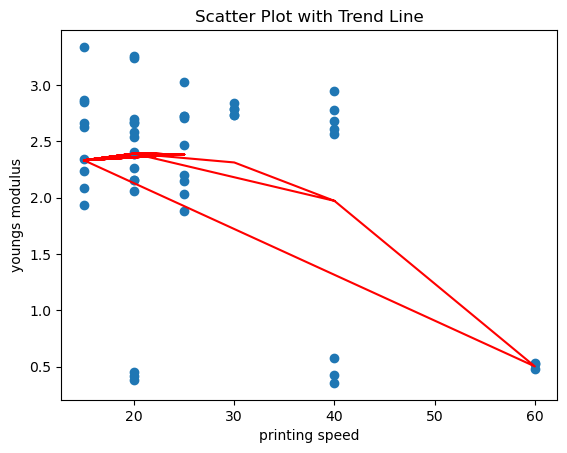

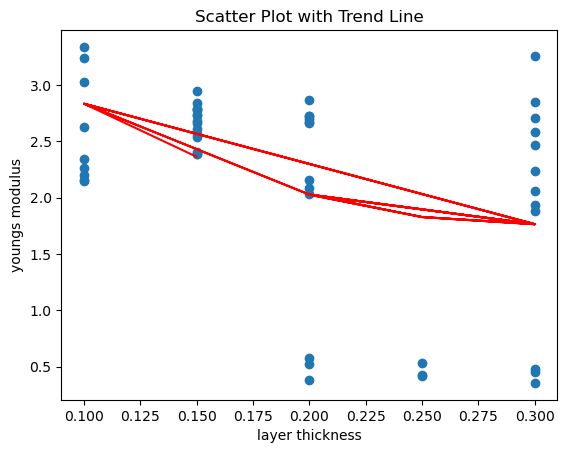

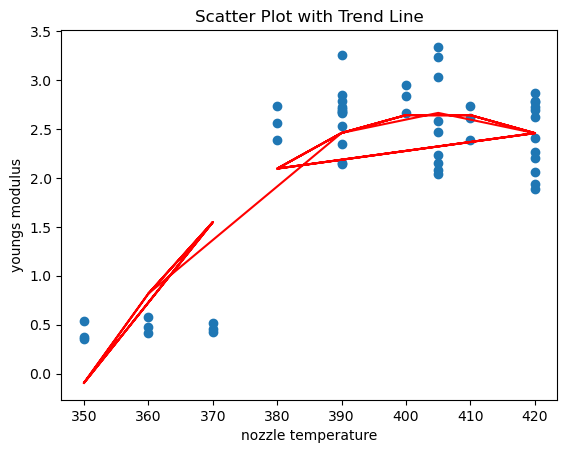

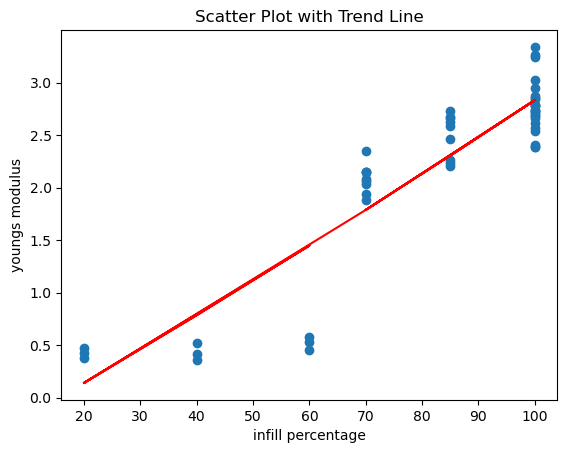

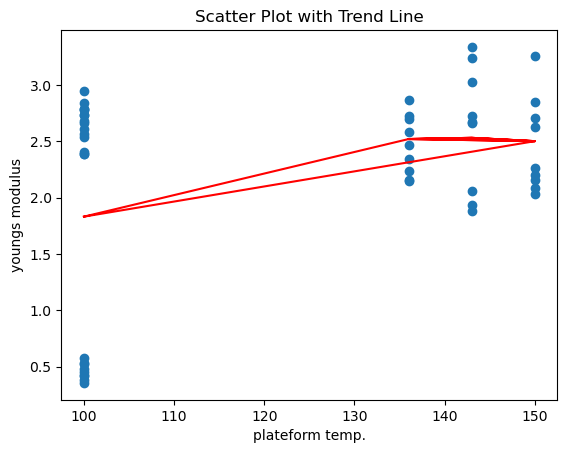

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = df1.drop(['youngs modulus'],axis=1)
y = df1['youngs modulus']
col_list=df1.drop(['youngs modulus'],axis=1).columns
for i in col_list:
    # Calculate the best-fit line using NumPy
    z = np.polyfit(x[i], y, 2)
    p = np.poly1d(z)
    # Plot the scatter plot and the trend line
    plt.scatter(x[i], y)
    plt.plot(x[i], p(x[i]), color='red')
    # Add labels and a title
    plt.xlabel(''+i)
    plt.ylabel('youngs modulus')
    plt.title('Scatter Plot with Trend Line')
    # Show the plot
    plt.show()

Text(0.5, 1.0, 'Spearman correlation coefficient for elastic modulus')

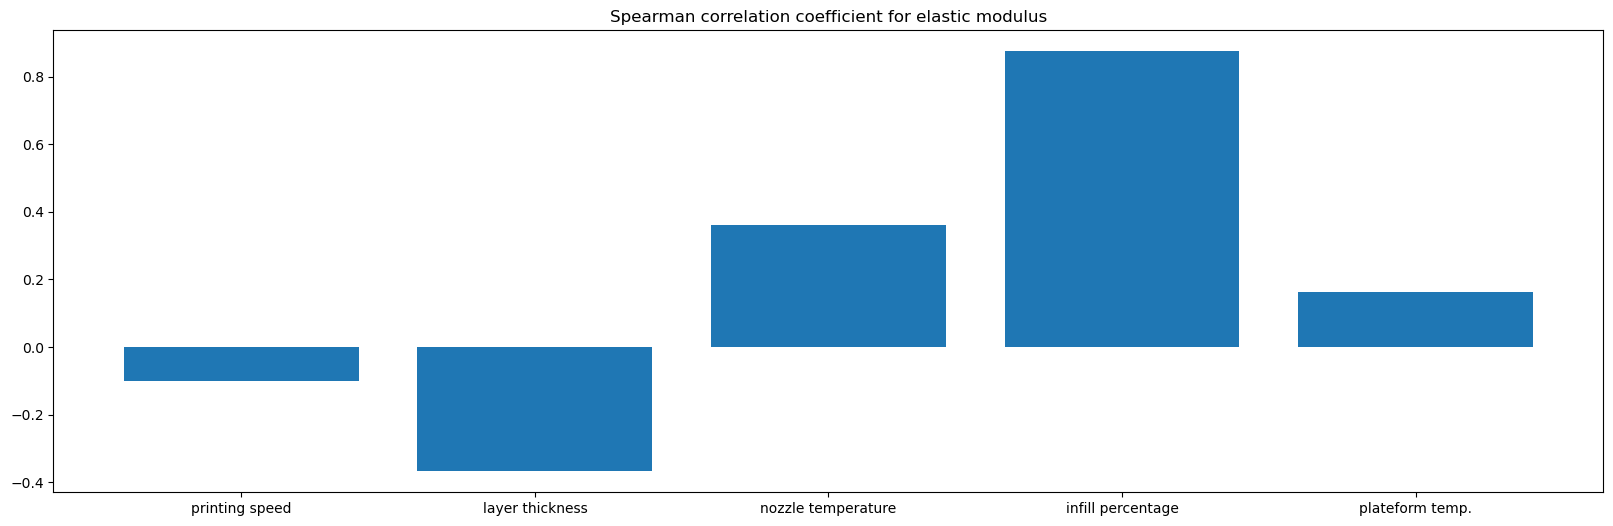

In [4]:
from scipy.stats import pearsonr
import scipy.stats as stats
col_list=df1.drop(['youngs modulus'],axis=1).columns
corr_coef_list=[]
p_value_list=[]
# calculates spearmann's correlation coefficient
for i in col_list:
    corr, pval = stats.spearmanr(df1.drop(['youngs modulus'],axis=1)[i],df1['youngs modulus'])
    corr_coef_list.append(corr)

plt.subplots(figsize=(20, 6))
plt.bar(col_list, corr_coef_list)
plt.title('Spearman correlation coefficient for elastic modulus')

In [5]:
x = df1.loc[:, df1. columns != 'youngs modulus'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y = df1['youngs modulus']

In [6]:
x_train1=x.iloc[:-8]
y_train1=y.iloc[:-8]
x_test1=x.tail(8)
y_test1=y.tail(8)

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some example dataM
X = np.array(x_train1)
Y = np.array(y_train1)

# Create polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
# Fit linear regression model
model = LinearRegression()
model.fit(X_poly,Y)

# Predict using the model
X_new = np.array(x_test1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

#print("Predicted y:", y_pred) 

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test1, y_pred)
mse=np.square(y_test1-y_pred).mean()
print('For polynomial regression for degree 1')
print('Mean squared error: ', mse)
print('R2 score: ', r2)


For polynomial regression for degree 1
Mean squared error:  0.14125794662322286
R2 score:  -9.271484354916929


In [9]:
MSE1=np.square(y_test1-y_pred).mean()
print(MSE1)

0.14125794662322286


In [10]:
MAE1=np.absolute(y_test1-y_pred).mean()
print(MAE1)
print('---------------------------------------------------')

0.3580911523033092
---------------------------------------------------


## neural network

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow import keras
from keras import metrics
from keras import optimizers
from keras import losses

In [12]:
input_layer = Input(shape=(5,)) # 5 dimensional input
hidden_layer1 = Dense(units=3, activation=keras.activations.tanh, name="hidden_layer1")(input_layer)
output = keras.layers.Dense(1,activation=None, use_bias=True)(hidden_layer1)
model10 = keras.models.Model(inputs=input_layer, outputs=output)
model10.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

In [13]:
model10.fit(x_train1,y_train1, batch_size=5, epochs=50,verbose=0)

In [14]:
y_predNN=model10.predict(x_test1)

1/1 [==============================] - 0s 67ms/step


In [15]:
MSE_NN1=np.square(y_test1.to_numpy()-y_predNN).mean()
print('Using Neural Network: ')
print(MSE_NN1)

Using Neural Network: 
0.07693296568966664


In [16]:
MAE_NN1=np.absolute(y_test1.to_numpy()-y_predNN).mean()
print(MAE_NN1)

0.20907142931222916


2/2 [==============================] - 0s 0s/step


<BarContainer object of 5 artists>

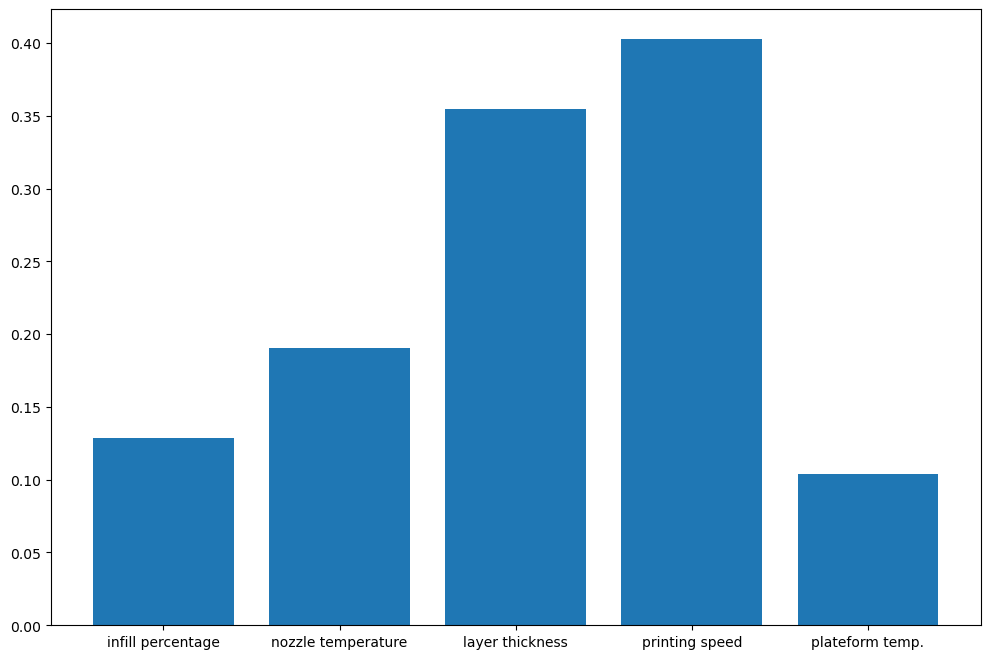

In [17]:
import keras
from keras import backend as K

# define a custom function to calculate feature importances
def get_feature_importances(model, X):
    # initialize an empty list to store feature importances
    importances = []
    # loop over each feature
    for i in range(X.shape[1]):
        # create a copy of the input data
        X_permuted = X.copy()
        # permute the values of the ith feature
        X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i])
        # predict using the permuted input data
        y_permuted = model.predict(X_permuted)
        # calculate the difference between the permuted and original predictions
        importances.append(np.mean(np.abs(y_permuted - model.predict(X))))
    return importances

# calculate feature importances
importances = get_feature_importances(model10, x_train1)

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train1.columns[i] for i in indices]

# # plot the feature importances
# plt.figure()
# plt.title("Feature Importance")
# plt.bar(range(x_train.shape[1]), importances[indices])
# plt.xticks(range(x_train.shape[1]), names, rotation=90)
# plt.show()
plt.subplots(figsize=(12, 8))
plt.bar(names, importances)


## Random forest regressor

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5,10,15,25],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2, 4,6,8],
    'min_samples_leaf': [1, 2, 4,6],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search Cross Validation to find the best hyperparameters
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
rf_cv.fit(x_train1, y_train1)

# Print the best hyperparameters


print('Using Random Forest Regression: ')
print('-----------------------------------------------------------------------------------------')
print("Best Hyperparameters:", rf_cv.best_params_)

# Evaluate the model on the testing set using the best hyperparameters
best_rf = RandomForestRegressor(**rf_cv.best_params_)
best_rf.fit(x_train1, y_train1)
test_score = best_rf.score(x_test1, y_test1)

print("Test Score:", test_score)


Using Random Forest Regression: 
-----------------------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 5}
Test Score: -1.640065075731152


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Train a random forest regressor model
model1 = RandomForestRegressor(max_depth= 50, max_features= 'auto', min_samples_leaf= 2,min_samples_split=8, n_estimators= 5)
model1.fit(x_train1, y_train1)

# Predict the properties using the test set
y_predRR1 = model1.predict(x_test1)

# Evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error
MSE11 = mean_squared_error(y_test1, y_predRR1)
print("Mean Squared Error:", MSE11)


Mean Squared Error: 0.02915526629404417


In [20]:
MAE_RR1=np.absolute(y_test1.to_numpy()-y_predRR1).mean()
MAE_RR1

0.14672434231318343

In [21]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor

# Define the objective function to be minimized
def objective(x, model):
    # Predict the target using the random forest model
    X = x_train1
    y_pred = model.predict(X)
    # Calculate the objective function as the negative of the target
    obj = 1/y_pred[0] # Minimize the target
    return obj

# Define the RSM function
def rsm(X, y):
    # Train a random forest model on the input and response variables
    model = RandomForestRegressor()
    model.fit(X, y)
    model.feature_names_ = X.columns.tolist()
    # Define the objective function to be minimized using the random forest model
    obj = lambda x: objective(x, model)
    # Define the bounds and initial guess for the input variables
    bounds = [(0, 1) for _ in range(X.shape[1])]
    x0 = np.mean(X, axis=0).values
    # Minimize the objective function using the L-BFGS-B algorithm
    res = minimize(obj, x0, bounds=bounds, method='L-BFGS-B')
    # Return the optimal input variables and response variables
    x_opt = pd.DataFrame(res.x.reshape(1, -1), columns=X.columns)
    y_opt = pd.DataFrame(model.predict(x_opt))[0]
    return x_opt, y_opt


# Run RSM to optimize the target
x_opt, y_opt = rsm(x_train1, y_train1)
print("Optimal response variables:\n", y_opt)
print("Optimal input variables:\n", x_opt)
# Print the optimal input variables and response variables
# df_max = df1.iloc[:, :-2].max()
# max=[]
# for i in df_max:
#     max.append(i)
# df_multiplied = x_opt.mul(max)
# print(df_multiplied)
# print("Optimal response variables:\n", y_opt)

Optimal response variables:
 0    2.597269
Name: 0, dtype: float64
Optimal input variables:
    printing speed  layer thickness  nozzle temperature  infill percentage  \
0         0.21447         0.511628            0.629568           0.725291   

   plateform temp.  
0             0.54  


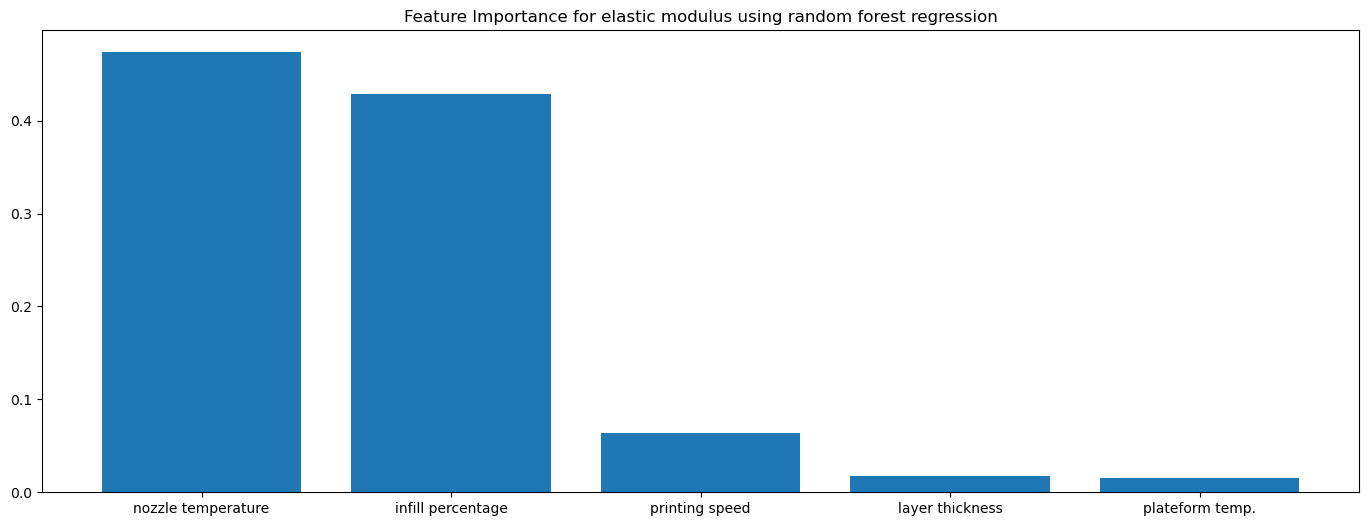

In [22]:
plt.subplots(figsize=(17, 6))
# create a random forest regressor object
rf = RandomForestRegressor()

# fit the random forest regressor to your data
rf.fit(x_train1, y_train1)

# calculate feature importances
importances = rf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train1.columns[i] for i in indices]

# plot the feature importances
# plt.figure()
plt.title("Feature Importance for elastic modulus using random forest regression")
plt.bar(range(x_train1.shape[1]), importances[indices])
plt.xticks(range(x_train1.shape[1]), names, rotation=0)

plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create a pipeline with a standard scaler and an SVR estimator
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Define the hyperparameter grid to search over
param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100,1000],
    'regressor__gamma': ['scale', 0.1, 1, 10,100]
}

# Create a GridSearchCV object with k-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=2)

# Fit the GridSearchCV object to the data

grid.fit(x_train1, y_train1)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Hyperparameters: {'regressor__C': 0.1, 'regressor__gamma': 10, 'regressor__kernel': 'rbf'}
Best Score: -0.40596172340383263


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# train a Support Vector Regression model
svr = SVR(kernel='linear', C=100, gamma='scale')
svr.fit(x_train1, y_train1)

# evaluate the model on the test set
y_predSV = svr.predict(x_test1)
mse = mean_squared_error(y_test1, y_predSV)
print("MSE:", mse)

MSE: 0.13947059977691034


In [25]:
np.absolute(y_test1.to_numpy()-y_predSV).mean()

0.3531321907592845

Feature importance:


<BarContainer object of 5 artists>

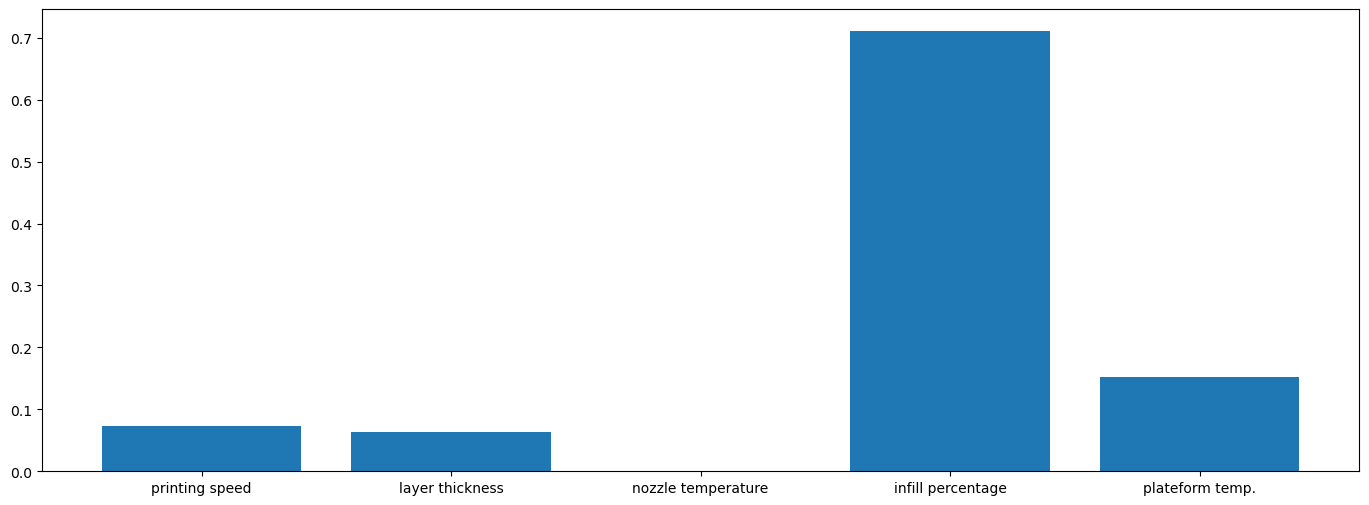

In [26]:
from sklearn.svm import SVR
plt.subplots(figsize=(17, 6))

# Fit the SVR model
svr = SVR(kernel='linear', C=100, epsilon=0.2)
svr.fit(x_train1, y_train1)

# Calculate the feature importance
coef = np.abs(svr.coef_)
feature_importance = (coef / np.sum(coef)).tolist()

# Print the feature importance
print("Feature importance:")
feature_list=[]
for i in range(5):
    feature_list.append(x_train1.columns[i])
plt.bar(feature_list, feature_importance[0])

In [27]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# create decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)

# fit the model on the training data
regressor.fit(x_train1, y_train1)

# make predictions on the test data
y_pred = regressor.predict(x_test1)

# evaluate the model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print('Mean squared error: ', mse)
print('R2 score: ', r2)


Mean squared error:  0.013048999999999988
R2 score:  0.05115002340494246


# Flexural strength

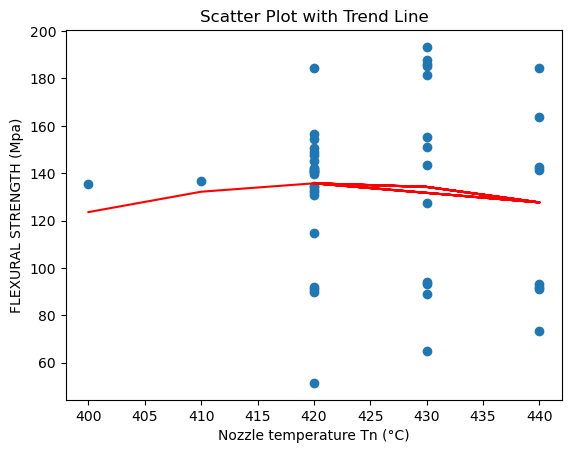

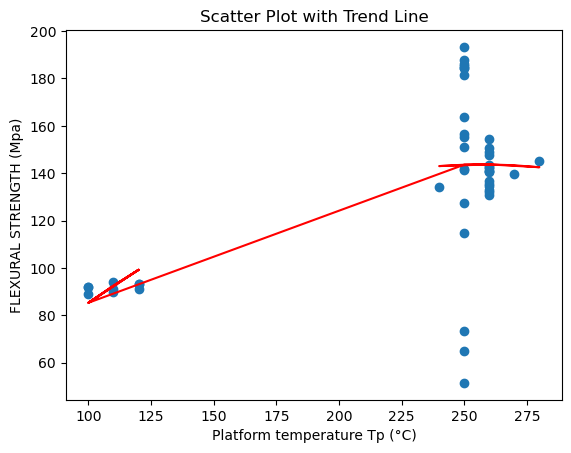

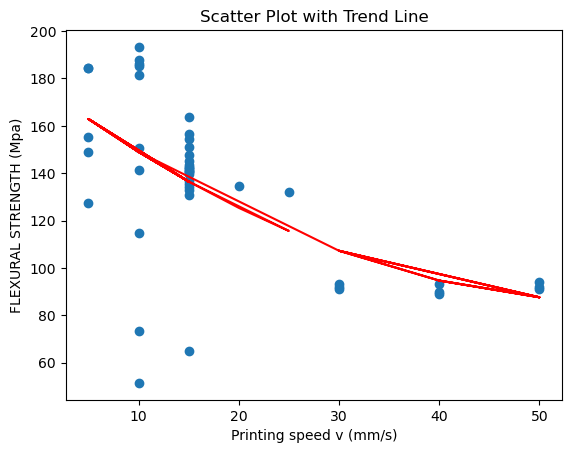

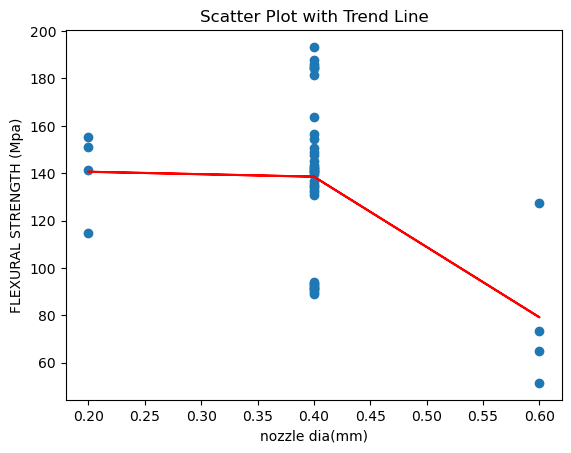

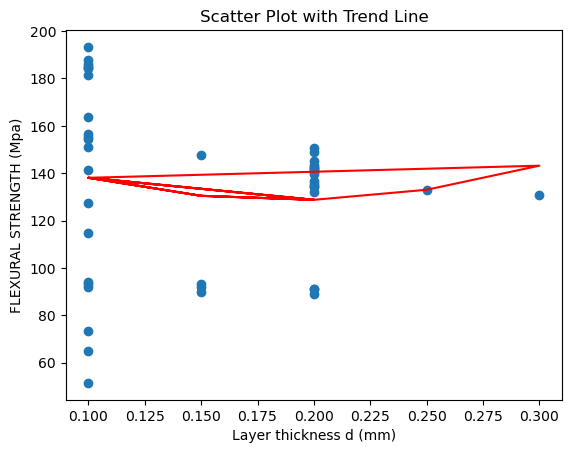

--------------------------------------------------------------------
Using polynomial regression: 
--------------------------------------------------------------------
MSE 339.02458159512105
MAE 15.505676026694145
1/1 [==============================] - 0s 29ms/step
--------------------------------------------------------------------
Using artificial neural network: 
--------------------------------------------------------------------
MSE 94.62136776962815
MAE 9.50784643765157
--------------------------------------------------------------------
Using support vector regression : 
--------------------------------------------------------------------
Best Hyperparameters: {'regressor__C': 100, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}
Best Score: -0.04917430401961403
MSE: 193.51060512078305
MAE: 11.409190948285787
--------------------------------------------------------------------
Using random forest regression: 
--------------------------------------------------------------

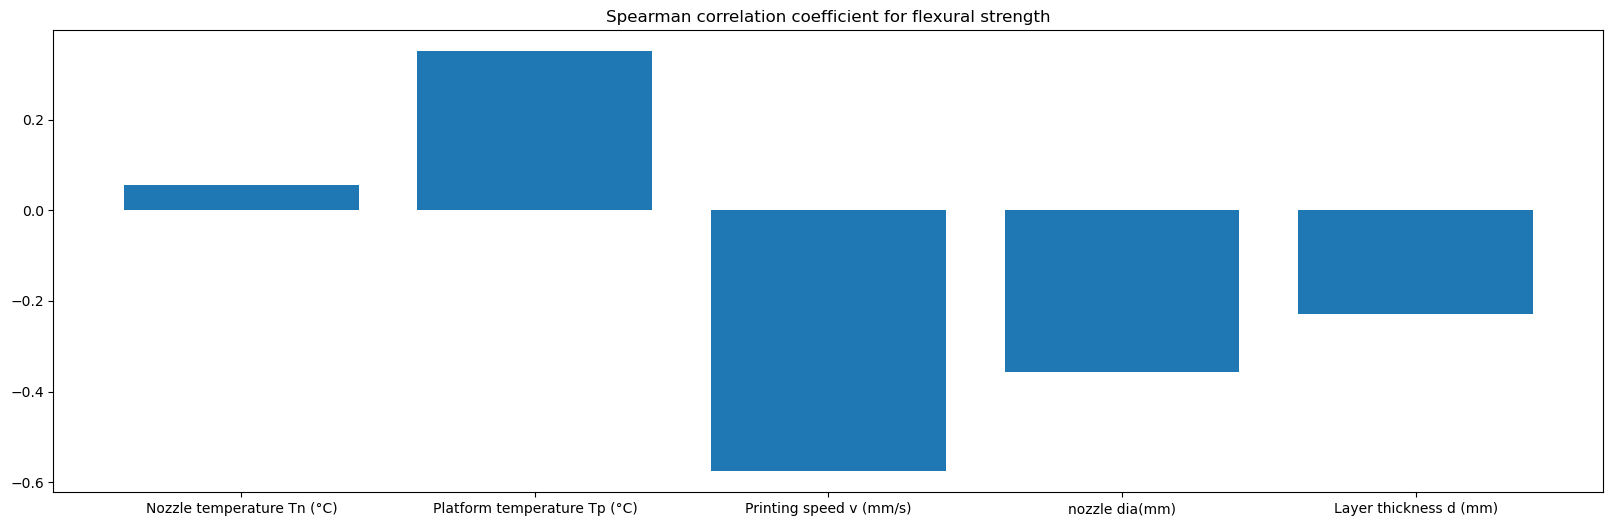

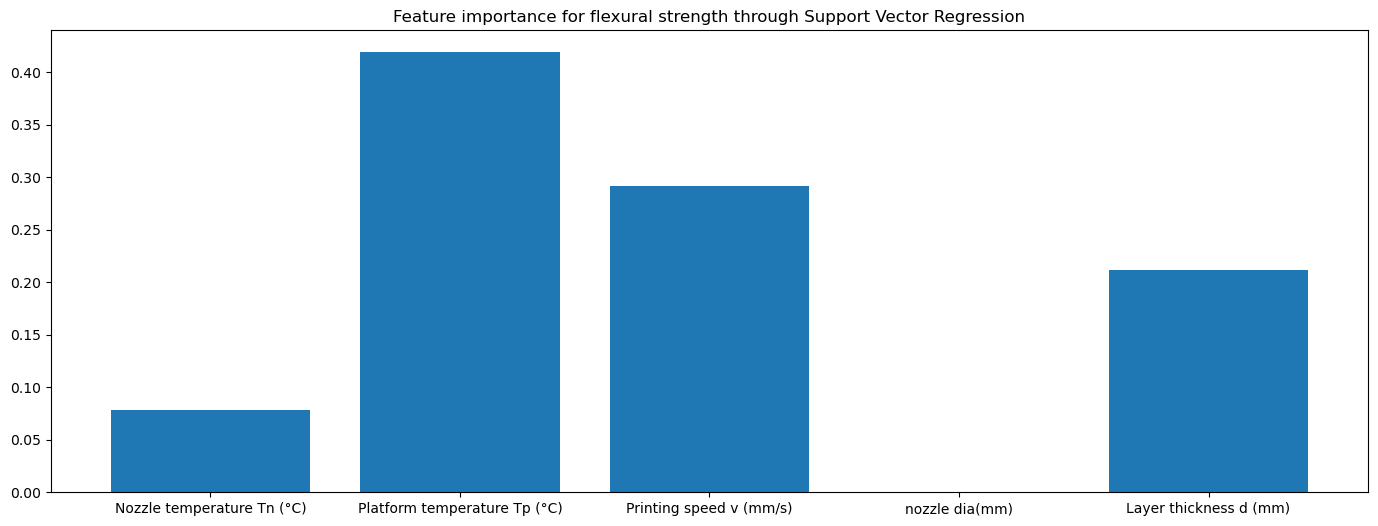

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df2.head()


#---------------------------------------------------------------------------------------
# 2d polynomial fit to the scatterplot
#---------------------------------------------------------------------------------------


import matplotlib.pyplot as plt
import numpy as np
# Create some sample data
x = df2.drop(['FLEXURAL STRENGTH (Mpa)'],axis=1)
y = df2['FLEXURAL STRENGTH (Mpa)']
col_list=df2.drop(['FLEXURAL STRENGTH (Mpa)'],axis=1).columns
for i in col_list:
    # Calculate the best-fit line using NumPy
    z = np.polyfit(x[i], y, 2)
    p = np.poly1d(z)
    # Plot the scatter plot and the trend line
    plt.scatter(x[i], y)
    plt.plot(x[i], p(x[i]), color='red')
    # Add labels and a title
    plt.xlabel(''+i)
    plt.ylabel('FLEXURAL STRENGTH (Mpa)')
    plt.title('Scatter Plot with Trend Line')
    # Show the plot
    plt.show()
    
    
    
#---------------------------------------------------------------------------------------
# spearmann's correlation of process parameters with the target property
#---------------------------------------------------------------------------------------




from scipy.stats import pearsonr
import scipy.stats as stats
col_list=df2.drop(['FLEXURAL STRENGTH (Mpa)'],axis=1).columns
corr_coef_list=[]
p_value_list=[]

# calculate soearmann's correlation coefficient

for i in col_list:
    corr, pval = stats.spearmanr(df2.drop(['FLEXURAL STRENGTH (Mpa)'],axis=1)[i],df2['FLEXURAL STRENGTH (Mpa)'])
    corr_coef_list.append(corr)
    
# print the correlation coefficient

plt.subplots(figsize=(20, 6))
plt.bar(col_list, corr_coef_list)
plt.title('Spearman correlation coefficient for flexural strength')



#---------------------------------------------------------------------------------------
# test train split of the data
#---------------------------------------------------------------------------------------



df22=df2.drop(['Nozzle temperature Tn (°C)'],axis=1)

x=df2.loc[:, df2. columns != 'FLEXURAL STRENGTH (Mpa)'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y= df2['FLEXURAL STRENGTH (Mpa)']

x_train2=x.iloc[:-8]
y_train2=y.iloc[:-8]
x_test2=x.tail(8)
y_test2=y.tail(8)


#---------------------------------------------------------------------------------------
# polynomial regression
#---------------------------------------------------------------------------------------


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some example dataM
X = np.array(x_train2)
Y = np.array(y_train2)

# Create polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly,Y)

# Predict using the model
X_new = np.array(x_test2)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

#print("Predicted y:", y_pred)
print('--------------------------------------------------------------------')
print('Using polynomial regression: ')
print('--------------------------------------------------------------------')
MSE2=np.square(y_test2-y_pred).mean()
print('MSE',MSE2)

MAE2=np.absolute(y_test2-y_pred).mean()
print('MAE',MAE2)



#---------------------------------------------------------------------------------------
# neural network
#---------------------------------------------------------------------------------------


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow import keras
from keras import metrics
from keras import optimizers
from keras import losses

input_layer = Input(shape=(5,)) # 4 dimensional input
hidden_layer1 = Dense(units=20, activation=keras.activations.tanh, name="hidden_layer1")(input_layer)
hidden_layer2 = Dense(units=20, activation=keras.activations.tanh, name="hidden_layer1")(hidden_layer1)
output = keras.layers.Dense(1,activation=None, use_bias=True)(hidden_layer1)
model10 = keras.models.Model(inputs=input_layer, outputs=output)
model10.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

model10.fit(x_train2,y_train2, batch_size=10, epochs=150,verbose=0)

y_predNN=model10.predict(x_test2)
print('--------------------------------------------------------------------')
print('Using artificial neural network: ')
print('--------------------------------------------------------------------')
MSE_NN2=np.square(y_test2.to_numpy()-y_predNN).mean()
print('MSE',MSE_NN2)

MAE_NN2=np.absolute(y_test2.to_numpy()-y_predNN).mean()
print('MAE',MAE_NN2)




#---------------------------------------------------------------------------------------
# support vector regression- finding optimal parameters
#---------------------------------------------------------------------------------------


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create a pipeline with a standard scaler and an SVR estimator
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Define the hyperparameter grid to search over
param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100,1000],
    'regressor__gamma': ['scale', 'auto', 0.1, 2, 10]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=7)

# Fit the GridSearchCV object to the data

grid.fit(x_train2, y_train2)

# Print the best hyperparameters and corresponding score
print('--------------------------------------------------------------------')
print('Using support vector regression : ')
print('--------------------------------------------------------------------')
print("Best Hyperparameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


#---------------------------------------------------------------------------------------
# applying support vector regression based on optimal hyperparameters
#---------------------------------------------------------------------------------------


from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# train a Support Vector Regression model
svr2 = SVR(kernel='linear', C=100, gamma='scale')
svr2.fit(x_train2, y_train2)

# evaluate the model on the test set
y_predSV = svr2.predict(x_test2)
MSE_SV2 = mean_squared_error(y_test2, y_predSV)
print("MSE:", MSE_SV2)

MAE_SV2=np.absolute(y_test2.to_numpy()-y_predSV).mean()
print("MAE:",MAE_SV2)

y_predSV

from sklearn.svm import SVR
plt.subplots(figsize=(17, 6))

# Fit the SVR model
svr2 = SVR(kernel='linear', C=100, epsilon=0.01)
svr2.fit(x_train2, y_train2)


#---------------------------------------------------------------------------------------
# Calculate the feature importance
#---------------------------------------------------------------------------------------



coef = np.abs(svr2.coef_)
feature_importance = (coef / np.sum(coef)).tolist()

# Print the feature importance

feature_list=[]
for i in range(5):
    feature_list.append(x_train2.columns[i])
plt.bar(feature_list, feature_importance[0])
plt.title('Feature importance for flexural strength through Support Vector Regression')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
print('--------------------------------------------------------------------')
print('Using random forest regression: ')
print('--------------------------------------------------------------------')
# Train a random forest regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(x_train2, y_train2)

# Predict the properties using the test set
y_predRR = model.predict(x_test2)

# Evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error
MSE_RR2 = mean_squared_error(y_test2, y_predRR)
print("MSE:", MSE_RR2)


MAE_RR2=np.absolute(y_test2.to_numpy()-y_predRR).mean()
print("MAE:", MAE_RR2)
print('--------------------------------------------------------------------')



#---------------------------------------------------------------------------------------
# decision tree
#---------------------------------------------------------------------------------------


# import required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# create decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)

# fit the model on the training data
regressor.fit(x_train2, y_train2)

# make predictions on the test data
y_pred = regressor.predict(x_test2)

# evaluate the model
MSE_DT = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
print('Using decision Tree: ')
print('--------------------------------------------------------------------')
print('MSE: ', MSE_DT)
print('R2 score: ', r2)
print('--------------------------------------------------------------------')







# Surface roughness

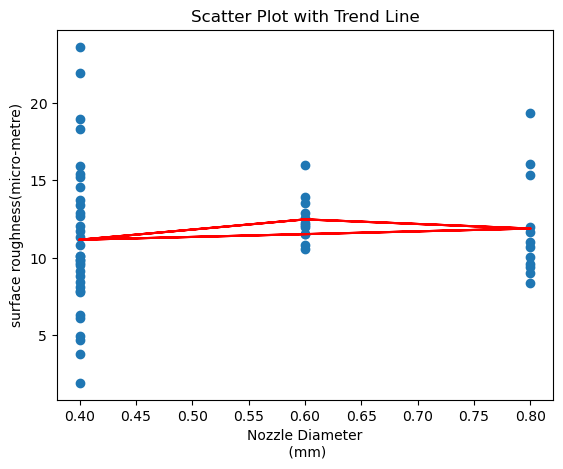

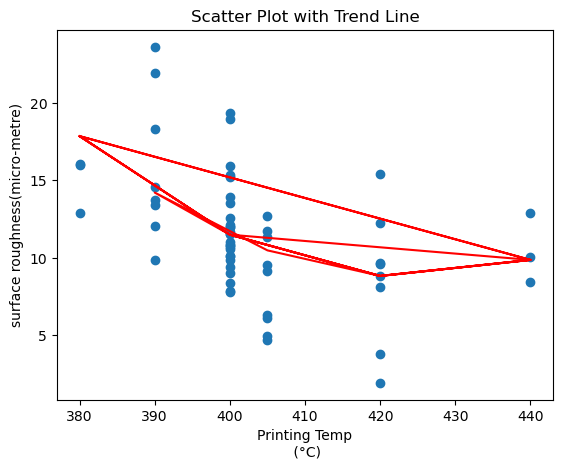

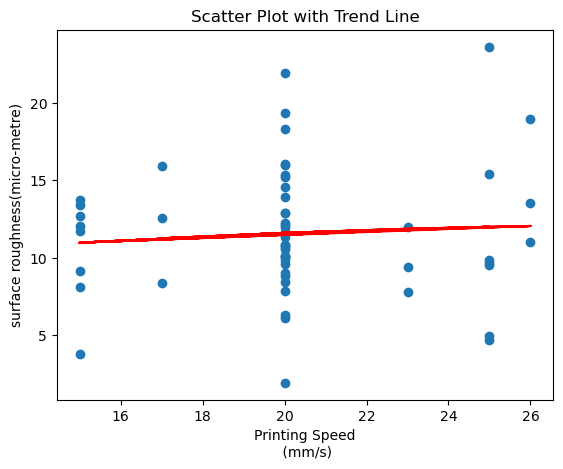

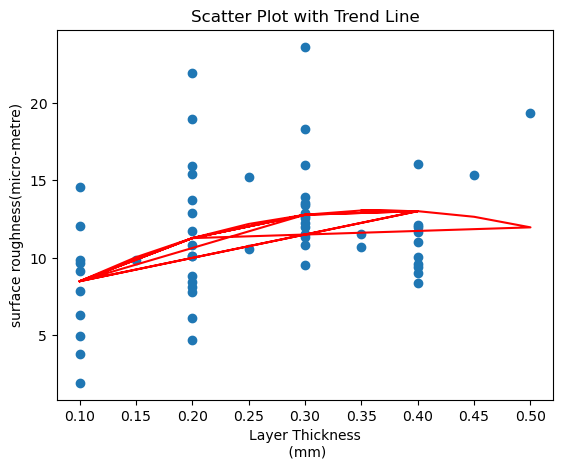

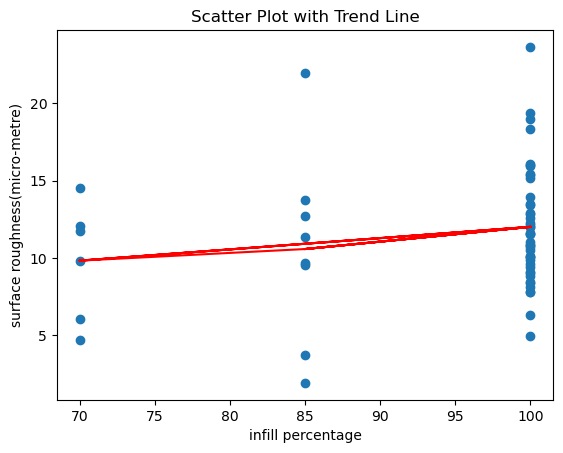

--------------------------------------------------------------------
Using polynomial regression: 
--------------------------------------------------------------------
R2 score:  -7.011275120432431e+24
MSE 2.1939172671698004e+26
MAE 11430675158254.19
--------------------------------------------------------------------
1/1 [==============================] - 0s 47ms/step
Using neural network: 
--------------------------------------------------------------------
MSE: 32.694967873727116
MAE: 4.580359536156196
--------------------------------------------------------------------
2/2 [==============================] - 0s 2ms/step
--------------------------------------------------------------------------------
Using Support Vector Regression: 
--------------------------------------------------------------------
MSE: 27.057956275010422
MAE: 4.01856349830063
--------------------------------------------------------------------
Using decision tree: 
------------------------------------------------

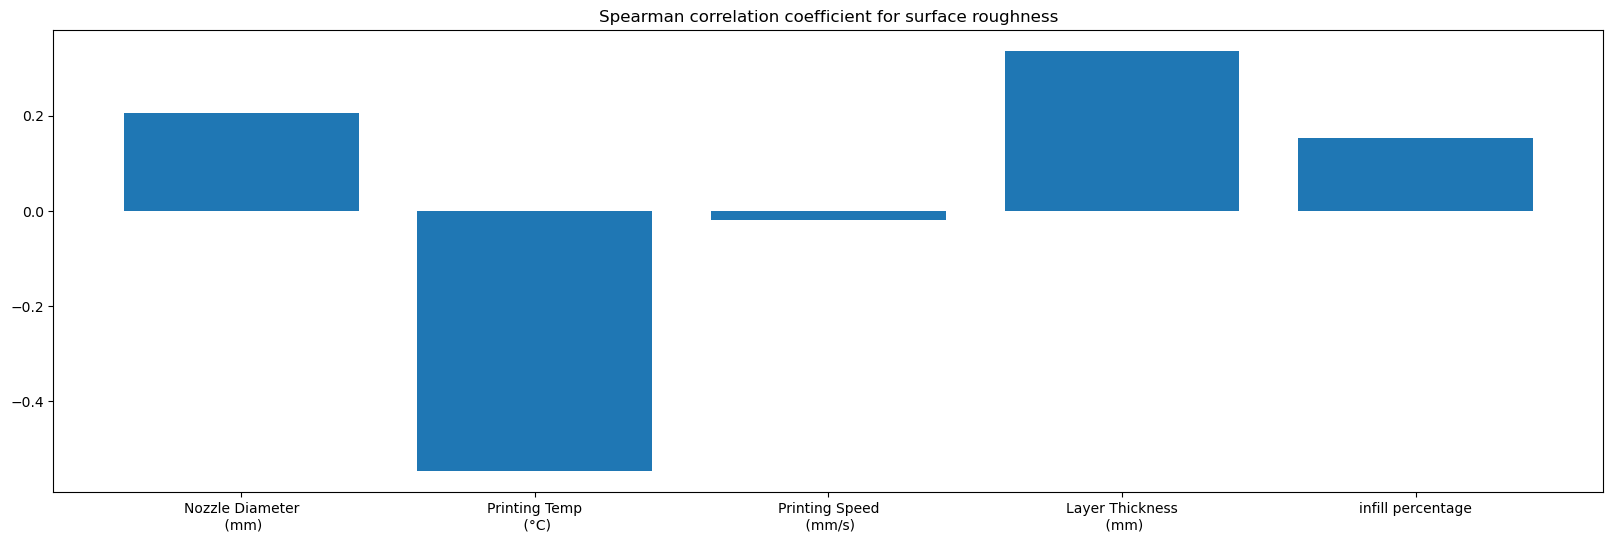

<Figure size 640x480 with 0 Axes>

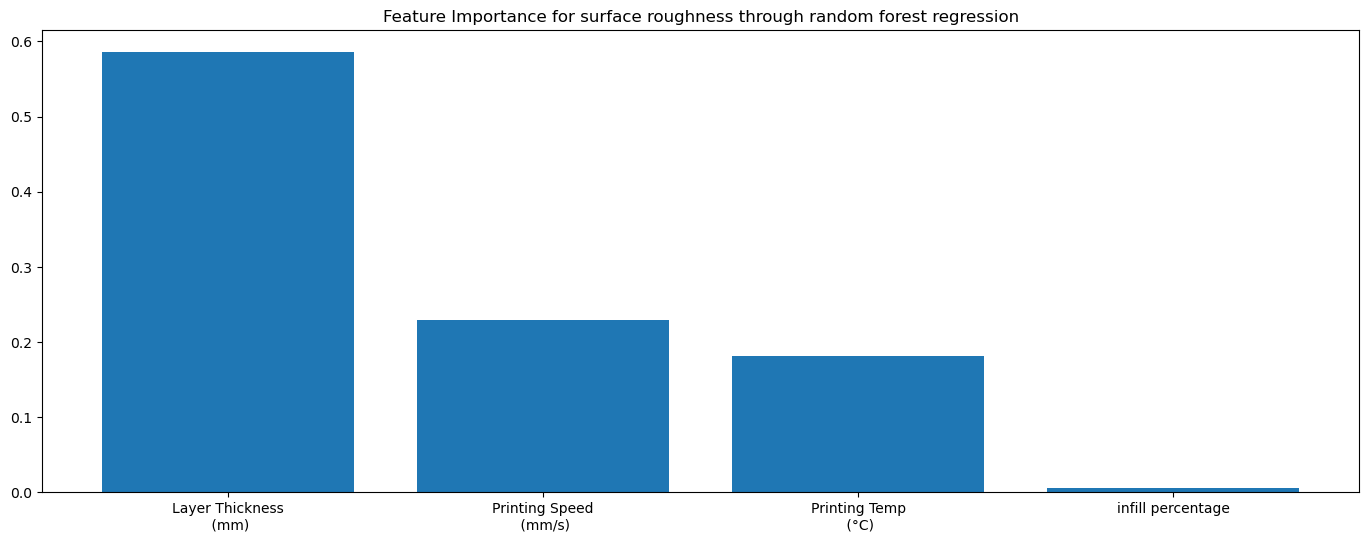

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df3.head()

df3.corr()


#---------------------------------------------------------------------------------------
# fitting 2 degree polynomial to the scatter plot
#---------------------------------------------------------------------------------------


import matplotlib.pyplot as plt
import numpy as np
# Create some sample data
x = df3.drop(['Roughness in Horizontal Direction\n (micro mm)'],axis=1)
y = df3['Roughness in Horizontal Direction\n (micro mm)']
col_list=df3.drop(['Roughness in Horizontal Direction\n (micro mm)'],axis=1).columns
for i in col_list:
 # Calculate the best-fit line using NumPy
    z = np.polyfit(x[i], y, 2)
    p = np.poly1d(z)
    # Plot the scatter plot and the trend line
    plt.scatter(x[i], y)
    plt.plot(x[i], p(x[i]), color='red')
    # Add labels and a title
    plt.xlabel(''+i)
    plt.ylabel('surface roughness(micro-metre)')
    plt.title('Scatter Plot with Trend Line')
    # Show the plot
    plt.show()

    
#---------------------------------------------------------------------------------------
# spearmann's correlation coefficient
#---------------------------------------------------------------------------------------


import scipy.stats as stats
col_list=df3.drop(['Roughness in Horizontal Direction\n (micro mm)'],axis=1).columns
corr_coef_list=[]
p_value_list=[]
# calculate Pearson's correlation coefficient
for i in col_list:
    corr, pval = stats.spearmanr(df3.drop(['Roughness in Horizontal Direction\n (micro mm)'],axis=1)[i],df3['Roughness in Horizontal Direction\n (micro mm)'])
    corr_coef_list.append(corr)
# print the correlation coefficient
#print("Pearson's correlation coefficient:", corr_coef)
plt.subplots(figsize=(20, 6))
plt.bar(col_list, corr_coef_list)
plt.title('Spearman correlation coefficient for surface roughness')


#---------------------------------------------------------------------------------------
# data normalization and test-train split
#---------------------------------------------------------------------------------------


df33= df3.drop(['Nozzle Diameter\n (mm)'],axis=1)

x=df33.loc[:, df33. columns != 'Roughness in Horizontal Direction\n (micro mm)'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y= df33['Roughness in Horizontal Direction\n (micro mm)']

x_train3=x.iloc[:-21]
y_train3=y.iloc[:-21]
x_test3=x.tail(21)
y_test3=y.tail(21)


#---------------------------------------------------------------------------------------
#predicting using polynomial regression
#---------------------------------------------------------------------------------------


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some example dataM
X = np.array(x_train3)
Y = np.array(y_train3)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly,Y)

# Predict using the model
X_new = np.array(x_test3)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

#print("Predicted y:", y_pred)
print('--------------------------------------------------------------------')
print('Using polynomial regression: ')
print('--------------------------------------------------------------------')
from sklearn.metrics import r2_score
r2 = r2_score(y_test3, y_pred)
mse=np.square(y_test3-y_pred).mean()
print('R2 score: ', r2)
MSE3=np.square(y_test3-y_pred).mean()
print('MSE', MSE3)

MAE3=np.absolute(y_test3-y_pred).mean()
print('MAE', MAE3)
print('--------------------------------------------------------------------')

#---------------------------------------------------------------------------------------
# predicting using neural network
#---------------------------------------------------------------------------------------


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow import keras
from keras import metrics
from keras import optimizers
from keras import losses

input_layer = Input(shape=(4,)) # 5 dimensional input
hidden_layer1 = Dense(units=20, activation=keras.activations.tanh, name="hidden_layer1")(input_layer)
hidden_layer2 = Dense(units=20, activation=keras.activations.tanh, name="hidden_layer1")(hidden_layer1)
output = keras.layers.Dense(1,activation=None, use_bias=True)(hidden_layer1)
model10 = keras.models.Model(inputs=input_layer, outputs=output)
model10.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

model10.fit(x_train3,y_train3, batch_size=10, epochs=150,verbose=0)

y_predNN=model10.predict(x_test3)


print('Using neural network: ')
print('--------------------------------------------------------------------')
MSE_NN3=np.square(y_test3.to_numpy()-y_predNN).mean()
print('MSE:', MSE_NN3)

MAE_NN3=np.absolute(y_test3.to_numpy()-y_predNN).mean()
print('MAE:', MAE_NN3)
print('--------------------------------------------------------------------')
import keras
from keras import backend as K


#---------------------------------------------------------------------------------------
# feature importance study for neural network
#---------------------------------------------------------------------------------------


# define a custom function to calculate feature importances
def get_feature_importances(model, X):
    # initialize an empty list to store feature importances
    importances = []
    # loop over each feature
    for i in range(X.shape[1]):
        # create a copy of the input data
        X_permuted = X.copy()
        # permute the values of the ith feature
        X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i])
        # predict using the permuted input data
        y_permuted = model.predict(X_permuted)
        # calculate the difference between the permuted and original predictions
        importances.append(np.mean(np.abs(y_permuted - model.predict(X))))
    return importances

# calculate feature importances
importances = get_feature_importances(model10, x_train3)

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train3.columns[i] for i in indices]

# # plot the feature importances
# plt.figure()
# plt.title("Feature Importance")
# plt.bar(range(x_train.shape[1]), importances[indices])
# plt.xticks(range(x_train.shape[1]), names, rotation=90)
# plt.show()
# plt.subplots(figsize=(12, 4))
# plt.bar(names, importances)



#---------------------------------------------------------------------------------------
# SUPPORT VECTOR REGRESSION - finding optimal hyperparmeter
#---------------------------------------------------------------------------------------



from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create a pipeline with a standard scaler and an SVR estimator
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Define the hyperparameter grid to search over
param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=6)

# Fit the GridSearchCV object to the data

grid.fit(x_train3, y_train3)

# Print the best hyperparameters and corresponding score
# print("Best Hyperparameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)


#---------------------------------------------------------------------------------------
# prediction using support vector regression
#---------------------------------------------------------------------------------------


print('--------------------------------------------------------------------------------')
print('Using Support Vector Regression: ')
print('--------------------------------------------------------------------')


from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# train a Support Vector Regression model
svr = SVR(kernel='rbf', C=10, gamma=0.1)
svr.fit(x_train3, y_train3)

# evaluate the model on the test set
y_predSV = svr.predict(x_test3)
MSE_SV3 = mean_squared_error(y_test3, y_predSV)
print("MSE:", MSE_SV3)


MAE_SV3=np.absolute(y_test3.to_numpy()-y_predSV).mean()
print("MAE:", MAE_SV3)
print('--------------------------------------------------------------------')

#---------------------------------------------------------------------------------------
# feature importance using support vector model
#---------------------------------------------------------------------------------------


# from sklearn.svm import SVR
# plt.subplots(figsize=(12, 6))

# # Fit the SVR model
# svr = SVR(kernel='linear', C=100, epsilon=2)
# svr.fit(x_train, y_train)

# # Calculate the feature importance
# coef = np.abs(svr.coef_)
# feature_importance = coef / np.sum(coef)

# # Print the feature importance
# print("Feature importance:")
# feature_list=[]
# for i in range(4):
#     feature_list.append(x_train.columns[i])
# plt.bar(feature_list, importances)

# import required libraries


#---------------------------------------------------------------------------------------
# predction using decision trees
#---------------------------------------------------------------------------------------



import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# create decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)

# fit the model on the training data
regressor.fit(x_train3, y_train3)

# make predictions on the test data
y_pred = regressor.predict(x_test3)
print('Using decision tree: ')
print('--------------------------------------------------------------------------------')
# evaluate the model
MSE_DT3 = mean_squared_error(y_test3, y_pred)
r2 = r2_score(y_test3, y_pred)

print('MSE: ', MSE_DT3)
print('R2 score: ', r2)

print('--------------------------------------------------------------------------------')

#---------------------------------------------------------------------------------------
# randomforest regresssor - finding optimal hyperparameters
#---------------------------------------------------------------------------------------


# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5,10,20,50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf3 = RandomForestRegressor()

# Perform Grid Search Cross Validation to find the best hyperparameters
rf3_cv = GridSearchCV(estimator=rf3, param_grid=param_grid, cv=4)
rf3_cv.fit(x_train3, y_train3)


print('Using Random forest: ')
print('--------------------------------------------------------------------------------')

# Print the best hyperparameters
print("Best Hyperparameters:", rf3_cv.best_params_)

# Evaluate the model on the testing set using the best hyperparameters
best_rf = RandomForestRegressor(**rf3_cv.best_params_)
best_rf.fit(x_train3, y_train3)
test_score = best_rf.score(x_train3, y_train3)
print("Test Score:", test_score)


#---------------------------------------------------------------------------------------
# predicting using optimal hyperparameters
#---------------------------------------------------------------------------------------


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Train a random forest regressor model
model3 = RandomForestRegressor(n_estimators=10, random_state=42)
model3.fit(x_train3, y_train3)

# Predict the properties using the test set
y_predRR = model3.predict(x_test3)

# Evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error
MSE_RR3 = mean_squared_error(y_test3, y_predRR)
print("Mean Squared Error:", MSE_RR3)
MAE_RR3=np.absolute(y_test3.to_numpy()-y_predRR).mean()
print("Mean Squared Error:", MAE_RR3)

print('--------------------------------------------------------------------------------')
#---------------------------------------------------------------------------------------
# feature importance as per random forest regression for surface roughness
#---------------------------------------------------------------------------------------


# create a random forest regressor object
rf = RandomForestRegressor()

# fit the random forest regressor to your data
rf.fit(x_train3, y_train3)

# calculate feature importances
importances = rf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train3.columns[i] for i in indices]

# plot the feature importances
plt.figure()
plt.subplots(figsize=(17, 6))
plt.title("Feature Importance for surface roughness through random forest regression")
plt.bar(range(x_train3.shape[1]), importances[indices])
plt.xticks(range(x_train3.shape[1]), names, rotation=0)
plt.show()

# Tensile strength 

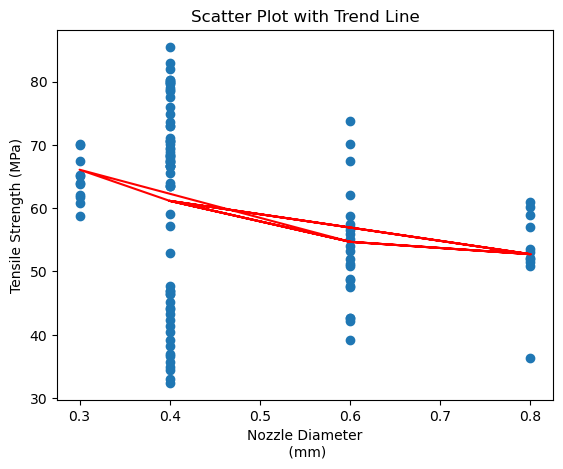

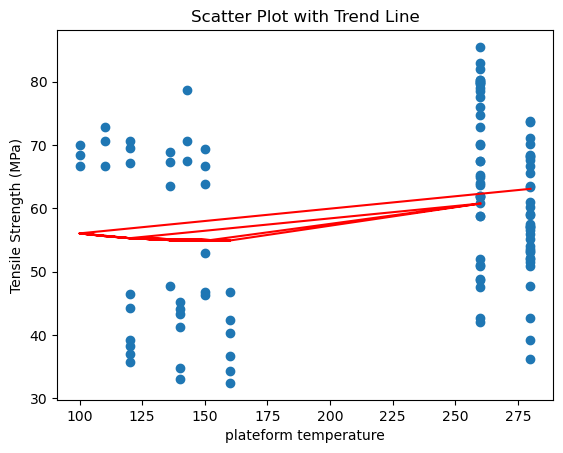

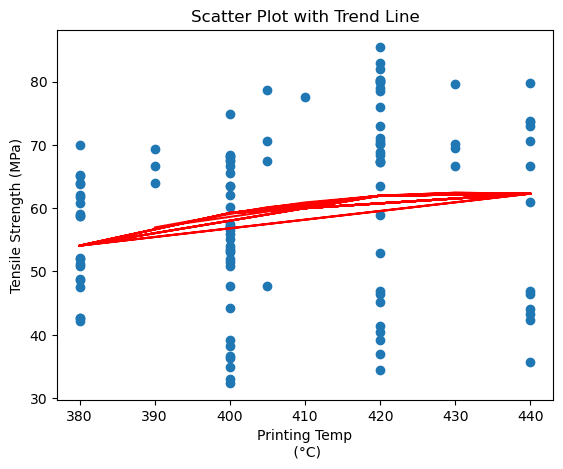

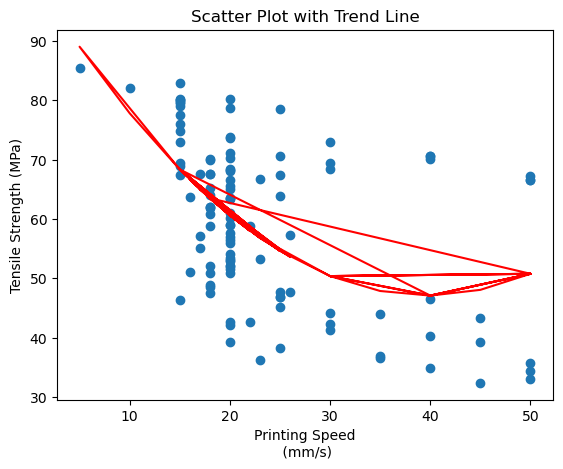

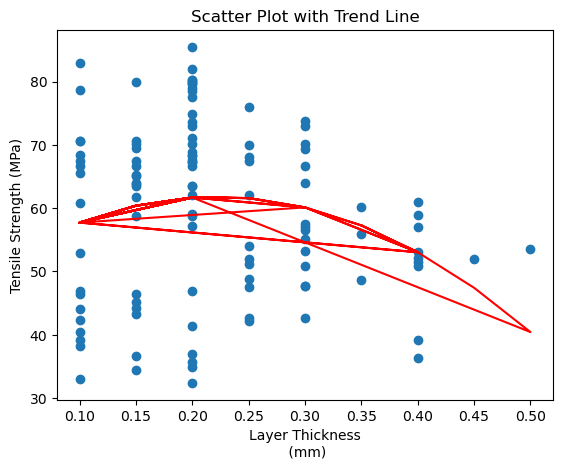

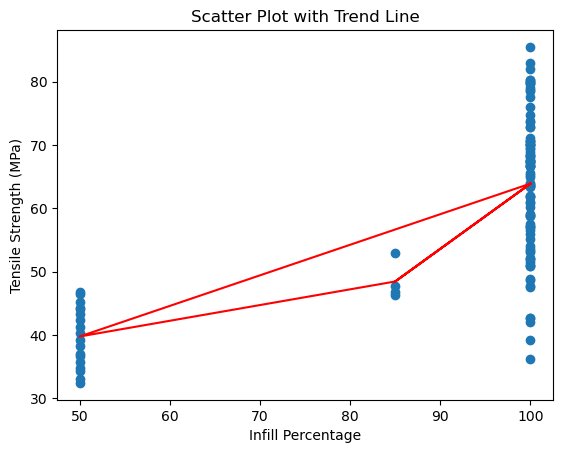

C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


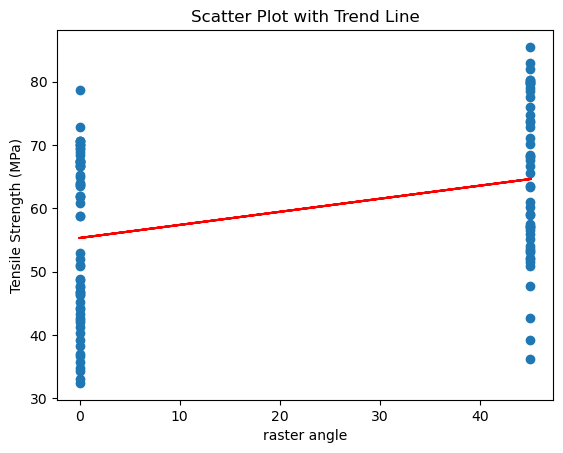

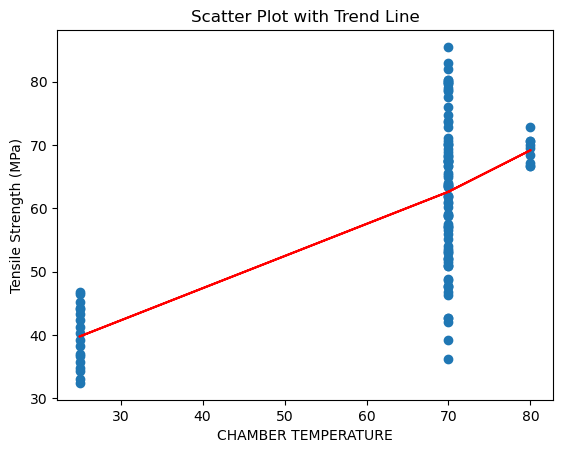

Using polynomial regression:
-------------------------------------------------------------------------
MSE: 53.67105298581954
MAE: 6.305466257564706
-------------------------------------------------------------------------
1/1 [==============================] - 0s 31ms/step
Using neural network :
-------------------------------------------------------------------------
MSE: 15.892243018590047
MAE: 2.8716486129760743
-------------------------------------------------------------------------
3/3 [==============================] - 0s 1ms/step
Using random forest :
-------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Score: 0.729558948114883
MSE: 21.9277915669607
MAE: 3.6985734754260724
-------------------------------------------------------------------------
Feature importance:


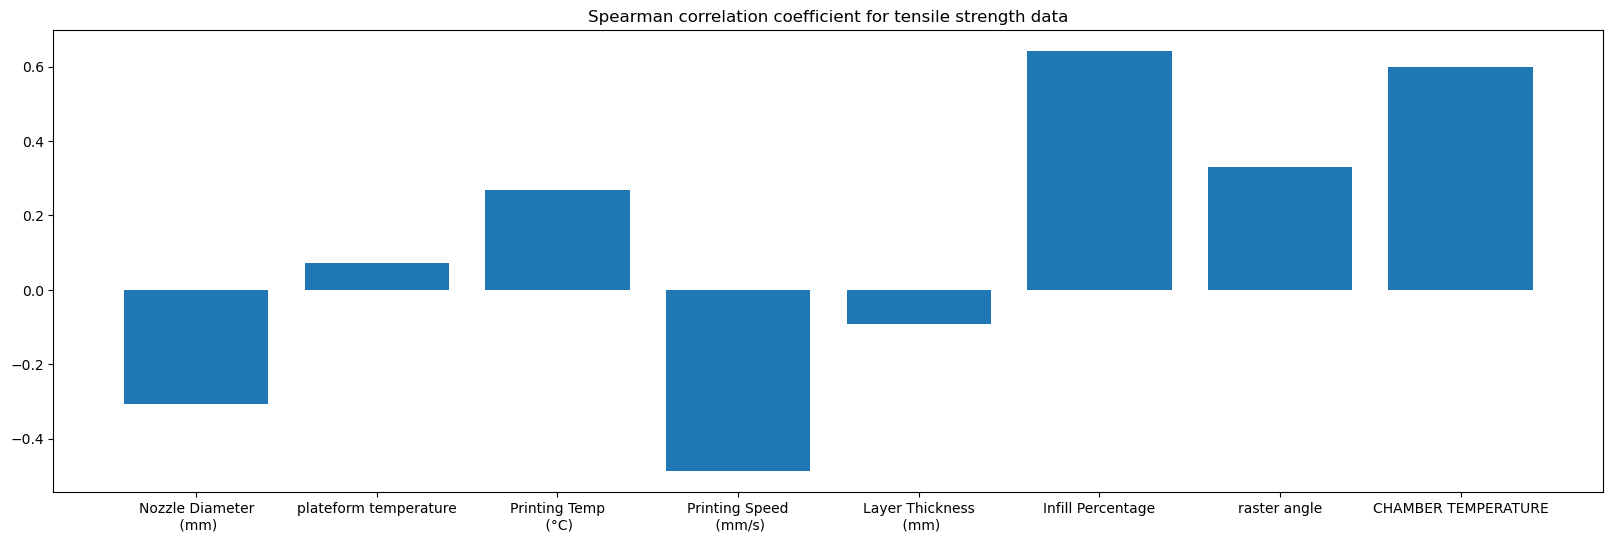

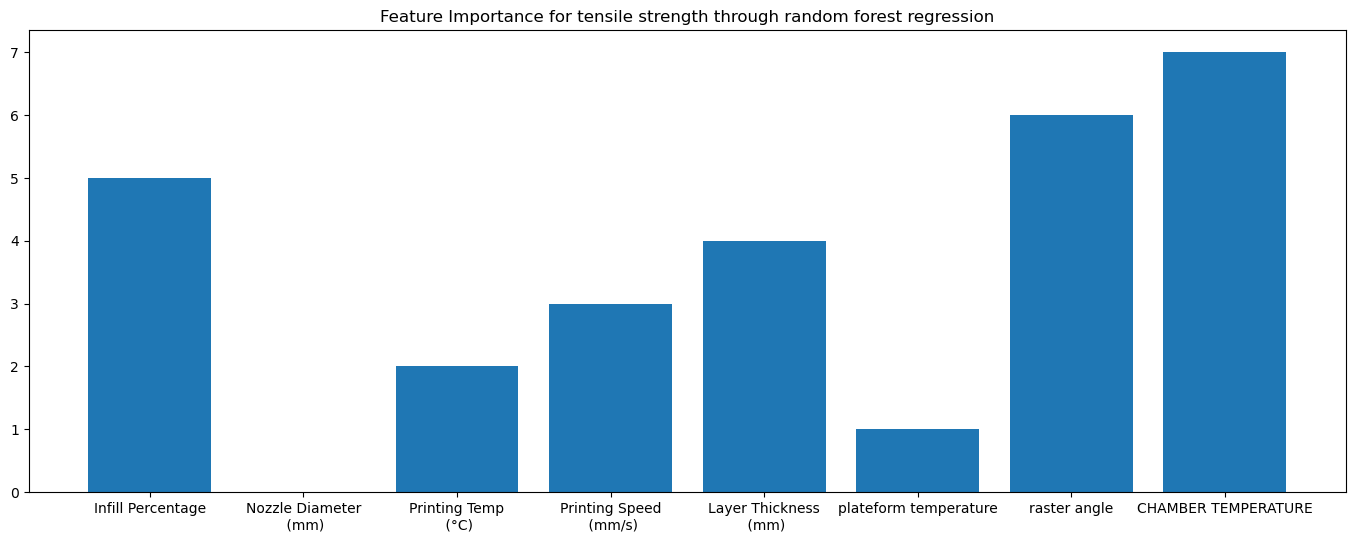

In [30]:
#---------------------------------------------------------------------------------------
# importing data
#---------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df4.head()

#---------------------------------------------------------------------------------------
# fitting 2 degree polynomial to the scatter plot
#---------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
# Create some sample data
x = df4.drop(['Tensile Strength\n (MPa)'],axis=1)
y = df4['Tensile Strength\n (MPa)']
col_list=df4.drop(['Tensile Strength\n (MPa)'],axis=1).columns
for i in col_list:
 # Calculate the best-fit line using NumPy
    z = np.polyfit(x[i], y, 2)
    p = np.poly1d(z)
    # Plot the scatter plot and the trend line
    plt.scatter(x[i], y)
    plt.plot(x[i], p(x[i]), color='red')
    # Add labels and a title
    plt.xlabel(''+i)
    plt.ylabel('Tensile Strength (MPa)')
    plt.title('Scatter Plot with Trend Line')
 # Show the plot
    plt.show()
    
#---------------------------------------------------------------------------------------
# spearmann's correlation coefficient
#---------------------------------------------------------------------------------------



import scipy.stats as stats
col_list=df4.drop(['Tensile Strength\n (MPa)'],axis=1).columns
corr_coef_list=[]
p_value_list=[]
# calculate Pearson's correlation coefficient
for i in col_list:
    corr, pval = stats.spearmanr(df4.drop(['Tensile Strength\n (MPa)'],axis=1)[i],df4['Tensile Strength\n (MPa)'])
    corr_coef_list.append(corr)
# print the correlation coefficient
#print("Pearson's correlation coefficient:", corr_coef)
plt.subplots(figsize=(20, 6))
plt.bar(col_list, corr_coef_list)
plt.title('Spearman correlation coefficient for tensile strength data')


#---------------------------------------------------------------------------------------
# data normalization and test train split
#---------------------------------------------------------------------------------------


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x=df4.loc[:, df4. columns != 'Tensile Strength\n (MPa)'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y= df4['Tensile Strength\n (MPa)']

x_train4=x.iloc[:-20]
y_train4=y.iloc[:-20]
x_test4=x.tail(20)
y_test4=y.tail(20)




#---------------------------------------------------------------------------------------
# Polynomial regression
#---------------------------------------------------------------------------------------


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some example dataM
X = np.array(x_train4)
Y = np.array(y_train4)

# Create polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly,Y)

# Predict using the model
X_new = np.array(x_test4)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

print('Using polynomial regression:')
print('-------------------------------------------------------------------------')
MSE4=np.square(y_test4-y_pred).mean()
print('MSE:',MSE4)
MAE4=np.absolute(y_test4-y_pred).mean()
print('MAE:',MAE4)
print('-------------------------------------------------------------------------')
#---------------------------------------------------------------------------------------
# Neural Network
#---------------------------------------------------------------------------------------


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow import keras
from keras import metrics
from keras import optimizers
from keras import losses



input_layer = Input(shape=(8,)) # 5 dimensional input
hidden_layer1 = Dense(units=20, activation=keras.activations.selu, name="hidden_layer1")(input_layer)

output = keras.layers.Dense(1, activation= None, use_bias=True)(hidden_layer1)
model10 = keras.models.Model(inputs=input_layer, outputs=output)
model10.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

model10.fit(x_train4,y_train4, batch_size=10, epochs=100, verbose=0)


y_predNN=model10.predict(x_test4)

print('Using neural network :')
print('-------------------------------------------------------------------------')
MSE_NN4=np.square(y_test4.to_numpy().reshape(-1,1)-y_predNN).mean()
print('MSE:',MSE_NN4)
MAE_NN4=np.absolute(y_test4.to_numpy().reshape(-1,1)-y_predNN).mean()
print('MAE:',MAE_NN4)

print('-------------------------------------------------------------------------')




#---------------------------------------------------------------------------------------
# feature importance study using neural network
#---------------------------------------------------------------------------------------


import keras
from keras import backend as K

# define a custom function to calculate feature importances
def get_feature_importances(model, X):
    # initialize an empty list to store feature importances
    importances = []
    # loop over each feature
    for i in range(X.shape[1]):
        # create a copy of the input data
        X_permuted = X.copy()
        # permute the values of the ith feature
        X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i])
        # predict using the permuted input data
        y_permuted = model.predict(X_permuted)
        # calculate the difference between the permuted and original predictions
        importances.append(np.mean(np.abs(y_permuted - model.predict(X))))
    return importances

# calculate feature importances
importances = get_feature_importances(model10, x_train4)

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train4.columns[i] for i in indices]

# # plot the feature importances
# plt.figure()
# plt.title("Feature Importance")
# plt.bar(range(x_train.shape[1]), importances[indices])
# plt.xticks(range(x_train.shape[1]), names, rotation=90)
# plt.show()
# plt.subplots(figsize=(20, 6))
# plt.bar(names, importances)


#---------------------------------------------------------------------------------------
# Random forest regressor- finding optimal hyperparameter
#---------------------------------------------------------------------------------------


# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search Cross Validation to find the best hyperparameters
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4)
rf_cv.fit(x_train4, y_train4)
print('Using random forest :')

print('-------------------------------------------------------------------------')




# Print the best hyperparameters
print("Best Hyperparameters:", rf_cv.best_params_)

# Evaluate the model on the testing set using the best hyperparameters
best_rf = RandomForestRegressor(**rf_cv.best_params_)
best_rf.fit(x_train4, y_train4)
test_score = best_rf.score(x_test4, y_test4)
print("Test Score:", test_score)


#---------------------------------------------------------------------------------------
# predicting using optimal hyperparameter
#---------------------------------------------------------------------------------------


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Train a random forest regressor model
model4 = RandomForestRegressor(max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50, random_state=42)
model4.fit(x_train4, y_train4)

# Predict the properties using the test set
y_predRR = model4.predict(x_test4)

# Evaluate the model performance using mean squared error
from sklearn.metrics import mean_squared_error
MSE_RR4 = mean_squared_error(y_test4, y_predRR)
print('MSE:',MSE_RR4)
MAE_RR4=np.absolute(y_test4-y_predRR).mean()
print('MAE:',MAE_RR4)


print('-------------------------------------------------------------------------')
#---------------------------------------------------------------------------------------
# feature importance study using random forest
#---------------------------------------------------------------------------------------


plt.subplots(figsize=(17, 6))
# create a random forest regressor object
rf = RandomForestRegressor()

# fit the random forest regressor to your data
rf.fit(x_train4, y_train4)

# calculate feature importances
importances = rf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train4.columns[i] for i in indices]

# plot the feature importances
# plt.figure()
plt.title("Feature Importance for tensile strength through random forest regression")
# plt.bar(range(x_train.shape[1]), importances[indices])
# plt.xticks(range(x_train.shape[1]), names, rotation=90)
# plt.show()
plt.bar(names,indices)


#---------------------------------------------------------------------------------------
# Support vector regression - finding optimal hyperparameters
#---------------------------------------------------------------------------------------




#np.absolute(y_test.to_numpy()-y_predSV).mean()

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create a pipeline with a standard scaler and an SVR estimator
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Define the hyperparameter grid to search over
param_grid = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=7)

# Fit the GridSearchCV object to the data

grid.fit(x_test4, y_test4)

# Print the best hyperparameters and corresponding score
# print("Best Hyperparameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)


#---------------------------------------------------------------------------------------
# prediction using Support vector regression 
#---------------------------------------------------------------------------------------

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
mse_list=[]
mae_list=[]
C_list=[0.001,0.01,0.1,1,10,100,1000]
for i in C_list:
    # train a Support Vector Regression model
    svr = SVR(kernel='rbf', C=i, gamma=0.01)
    svr.fit(x_train4, y_train4)

    # evaluate the model on the test set
    y_predSV = svr.predict(x_test4)
    mse = mean_squared_error(y_test4, y_predSV)
    mae_list.append(np.absolute(y_test4.to_numpy()-y_predSV).mean())
C_list[mae_list.index(min(mae_list))]
#mae_list.index(min(mae_list))

#---------------------------------------------------------------------------------------
# feature importance study using support vector machine
#---------------------------------------------------------------------------------------

from sklearn.svm import SVR
#plt.subplots(figsize=(17, 6))

# Fit the SVR model
svr = SVR(kernel='linear', C=100, epsilon=0.01)
svr.fit(x_train4, y_train4)

# Calculate the feature importance
coef = np.abs(svr.coef_)
feature_importance = (coef / np.sum(coef)).tolist()

# Print the feature importance
print("Feature importance:")
feature_list=[]
for i in range(8):
    feature_list.append(x_train4.columns[i])
#plt.bar(feature_list, feature_importance[0])







# combined tensile strength and roughness

---------------------------------------------------------------------------------
Using polynomial regression: 
---------------------------------------------------------------------------------
MSE5:  Tensile Strength\n (MPa)                          31.865305
Roughness in Horizontal Direction\n (micro mm)    15.732028
dtype: float64
R2 score:  -0.3057788943933274
MAE5:  Tensile Strength\n (MPa)                          4.500977
Roughness in Horizontal Direction\n (micro mm)    3.294387
dtype: float64
---------------------------------------------------------------------------------
------------------------------------------------------------------
Using random forest: 
------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 5}
Test Score: -0.37848939501056605
Mean squared error = Tensile Strength\n (MPa)                          75.950217
Roughness i

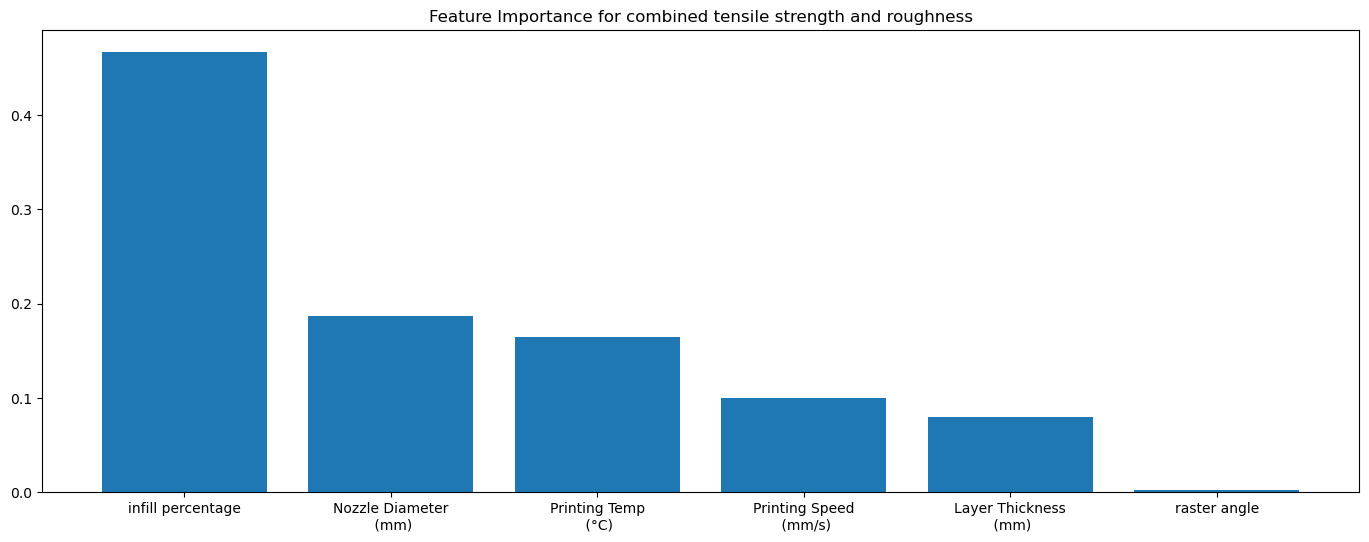

------------------------------------------------------------------
Using neural network: 
------------------------------------------------------------------
1/1 [==============================] - 0s 47ms/step
MSE: 24.101385555727777
MAE: 3.790179716746012
------------------------------------------------------------------


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df5.head()


#----------------------------------------------------------------------------------------
# test train split
#----------------------------------------------------------------------------------------


x=df5.drop(['Tensile Strength\n (MPa)','Roughness in Horizontal Direction\n (micro mm)'],axis=1).apply(lambda x: (x-x.min())/(x.max()-x.min()))
y= df5[['Tensile Strength\n (MPa)','Roughness in Horizontal Direction\n (micro mm)']]

x_train5 = x.iloc[:-15]
y_train5 = y.iloc[:-15]
x_test5 = x.tail(15)
y_test5 = y.tail(15)




#----------------------------------------------------------------------------------------
# polynomial regression
#----------------------------------------------------------------------------------------
print('---------------------------------------------------------------------------------')
print('Using polynomial regression: ')
print('---------------------------------------------------------------------------------')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
# Generate some example dataM
X = np.array(x_train5)
Y = np.array(y_train5)

# Create polynomial features
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly,Y)

# Predict using the model
X_new = np.array(x_test5)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

#print("Predicted y:", y_pred)

MSE5=np.square(y_test5-y_pred).mean()
r2 = r2_score(y_test5, y_pred)
print('MSE5: ', MSE5)
print('R2 score: ', r2)
MAE5=np.absolute(y_test5-y_pred).mean()
print('MAE5: ', MAE5)
print('---------------------------------------------------------------------------------')

#----------------------------------------------------------------------------------------
# random forest regression- finding best hyperparameters based on grid search CV
#----------------------------------------------------------------------------------------

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5,10,15,25],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2, 4,6,8],
    'min_samples_leaf': [1, 2, 4,6],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search Cross Validation to find the best hyperparameters
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4)
rf_cv.fit(x_train5, y_train5)
print('------------------------------------------------------------------')
print('Using random forest: ')
print('------------------------------------------------------------------')
# Print the best hyperparameters
print("Best Hyperparameters:", rf_cv.best_params_)

# Evaluate the model on the testing set using the best hyperparameters
best_rf = RandomForestRegressor(**rf_cv.best_params_)
best_rf.fit(x_train5, y_train5)
test_score = best_rf.score(x_test5, y_test5)

print("Test Score:", test_score)

#----------------------------------------------------------------------------------------
# prediciting using random forest regression based on tuned hyperparameters
#----------------------------------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Train a random forest regressor model
model5 = RandomForestRegressor(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1,min_samples_split=4, n_estimators= 5)
model5.fit(x_train5, y_train5)

# Predict the properties using the test set
y_predRR = model5.predict(x_test5)

# Evaluate the model performance using mean squared error
MSE_RR5=np.square(y_test5-y_predRR).mean()
print(f'Mean squared error = {MSE_RR5}')
MAE_RR5=np.absolute(y_test5-y_predRR).mean()
print(f'Mean absolute error ={MAE_RR5}')
print('------------------------------------------------------------------')
plt.subplots(figsize=(17, 6))
# create a random forest regressor object
rf = RandomForestRegressor()

# fit the random forest regressor to your data
rf.fit(x_train5, y_train5)

# calculate feature importances
importances = rf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [x_train5.columns[i] for i in indices]

# plot the feature importances
# plt.figure()
plt.title("Feature Importance for combined tensile strength and roughness")
plt.bar(range(x_train5.shape[1]), importances[indices])
plt.xticks(range(x_train5.shape[1]), names, rotation=0)
plt.show()

x_train5


#----------------------------------------------------------------------------------------
# artificial neural network
#----------------------------------------------------------------------------------------



import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow import keras
from keras import metrics
from keras import optimizers
from keras import losses

input_layer = Input(shape=(6,)) # 5 dimensional input
hidden_layer1 = Dense(units=20, activation=keras.activations.selu, name="hidden_layer1")(input_layer)

output = keras.layers.Dense(2, activation= None, use_bias=True)(hidden_layer1)
model10 = keras.models.Model(inputs=input_layer, outputs=output)
model10.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

model10.fit(x_train5,y_train5, batch_size=10, epochs=100, verbose=0)

print('------------------------------------------------------------------')
print('Using neural network: ')
print('------------------------------------------------------------------')
y_predNN=model10.predict(x_test5)

MSE_NN5=np.square(y_test5.to_numpy()-y_predNN).mean()
print('MSE:',MSE_NN5)
MAE_NN5=np.absolute(y_test5.to_numpy()-y_predNN).mean()
print('MAE:',MAE_NN5)
print('------------------------------------------------------------------')

# -------------------------------------------------------------------------------
# optimization of tensile strength and surface roughness
# -------------------------------------------------------------------------------

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression

#----------------------------------------------------------------------------------------
# test train split
#----------------------------------------------------------------------------------------



from sklearn.model_selection import train_test_split

x_train6=df6.iloc[:, :-2].apply(lambda x: x/x.max())
y_train6=df6.iloc[:, 5:7]
x_test6=df7.iloc[:, :-2].apply(lambda x: x/x.max())
y_test6=df7.iloc[:, 5:7]


#----------------------------------------------------------------------------------------
# using Response Surface methodology to optimize tensile strength and surface roughess
#----------------------------------------------------------------------------------------



import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor

# Define the objective function to be minimized
def objective(x, model, target1, target2, weight1, weight2):
    # Predict the two targets using the random forest model
    X = x_train5
    y_pred = model.predict(X)
    # Calculate the objective function as a weighted sum of the two targets
    obj1 = -y_pred[0, target1] * weight1 # Maximize the target1
    obj2 = y_pred[0, target2] * weight2 # Minimize the target2
    return obj1 + obj2

# Define the RSM function
def rsm(X, y, target1, target2, weight1, weight2):
    # Train a random forest model on the input and response variables
    model = RandomForestRegressor()
    model.fit(X, y)
    model.feature_names_ = X.columns.tolist()
    # Define the objective function to be minimized using the random forest model
    obj = lambda x: objective(x, model, target1, target2, weight1, weight2)
    # Define the bounds and initial guess for the input variables
    bounds = [(0, 1) for _ in range(X.shape[1])]
    x0 = np.mean(X, axis=0).values
    # Minimize the objective function using the L-BFGS-B algorithm
    res = minimize(obj, x0, bounds=bounds, method='L-BFGS-B')
    # Return the optimal input variables and response variables
    x_opt = pd.DataFrame(res.x.reshape(1, -1), columns=X.columns)
    y_opt = pd.DataFrame(model.predict(x_opt), columns=y.columns)
    return x_opt, y_opt


# Define the target variables and their weights
target1 = 0 # Index of the first target variable to be maximized
target2 = 1 # Index of the second target variable to be minimized
weight1 = 1 # Weight for the first target variable
weight2 = 1 # Weight for the second target variable

# Run RSM to optimize the two targets simultaneously
x_opt, y_opt = rsm(x_train5, y_train5, target1, target2, weight1, weight2)

# Print the optimal input variables and response variables
df_max = df5.drop(['Tensile Strength\n (MPa)','Roughness in Horizontal Direction\n (micro mm)'],axis=1).max()
max=[]
for i in df_max:
    max.append(i)
df_multiplied = x_opt.mul(max)

print("Optimal input variables:\n", df_multiplied)
print("Optimal response variables:\n", y_opt)








Optimal input variables:
    Nozzle Diameter\n (mm)  Printing Temp\n (°C)  Printing Speed\n (mm/s)  \
0                0.315152            227.083333                11.853994   

   Layer Thickness\n (mm)  infill percentage  raster angle  
0                0.180871          84.848485     24.545455  
Optimal response variables:
    Tensile Strength\n (MPa)  Roughness in Horizontal Direction\n (micro mm)
0                 67.225554                                       13.099585


In [33]:
model5.predict(x_opt)

array([[67.22562316, 13.48717868]])

# -----------------------------------------------
# Optimization of elastic modulus
# -----------------------------------------------

In [34]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor

# Define the objective function to be minimized
def objective1(x, model):
    # Predict the target using the random forest model
    X = x_train1
    y_pred = model.predict(X)
    # Calculate the objective function as the negative of the target
    obj = 1/y_pred[0] # Minimize the target
    return obj

# Define the RSM function
def rsm1(X, y):
    # Train a random forest model on the input and response variables
    model = RandomForestRegressor()
    model.fit(X, y)
    model.feature_names_ = X.columns.tolist()
    # Define the objective function to be minimized using the random forest model
    obj = lambda x: objective1(x, model)
    # Define the bounds and initial guess for the input variables
    bounds = [(0, 1) for _ in range(X.shape[1])]
    x0 = np.mean(X, axis=0).values
    # Minimize the objective function using the L-BFGS-B algorithm
    res = minimize(obj, x0, bounds=bounds, method='L-BFGS-B')
    # Return the optimal input variables and response variables
    x_opt1 = pd.DataFrame(res.x.reshape(1, -1), columns=X.columns)
    y_opt1 = pd.DataFrame(model.predict(x_opt1))[0]
    return x_opt1, y_opt1


# Run RSM to optimize the target
x_opt1, y_opt1 = rsm1(x_train1, y_train1)

# Print the optimal input variables and response variables
df_max = df1.loc[:, df1. columns != 'youngs modulus'].max()
max=[]
for i in df_max:
    max.append(i)
df_multiplied = x_opt1.mul(max)
print("Optimal input variables:\n", df_multiplied)
print("Optimal response variables:\n", y_opt1)

Optimal input variables:
    printing speed  layer thickness  nozzle temperature  infill percentage  \
0       12.868217         0.153488          264.418605           72.52907   

   plateform temp.  
0             81.0  
Optimal response variables:
 0    2.637312
Name: 0, dtype: float64


In [35]:
model1.predict(x_opt1)

array([2.57956485])

# -----------------------------------------------
# Optimization of tensile strength
# -----------------------------------------------

In [36]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor

# Define the objective function to be minimized
def objective2(x, model):
    # Predict the target using the random forest model
    X = x_train4
    y_pred = model.predict(X)
    # Calculate the objective function as the negative of the target
    obj =1/y_pred[0] # Minimize the target
    return obj

# Define the RSM function
def rsm2(X, y):
    # Train a random forest model on the input and response variables
    model = RandomForestRegressor()
    model.fit(X, y)
    model.feature_names_ = X.columns.tolist()
    # Define the objective function to be minimized using the random forest model
    obj = lambda x: objective2(x, model)
    # Define the bounds and initial guess for the input variables
    bounds = [(0, 1) for _ in range(X.shape[1])]
    x0 = np.mean(X, axis=0).values
    # Minimize the objective function using the L-BFGS-B algorithm
    res = minimize(obj, x0, bounds=bounds, method='L-BFGS-B')
    # Return the optimal input variables and response variables
    x_opt2 = pd.DataFrame(res.x.reshape(1, -1), columns=X.columns)
    y_opt2 = pd.DataFrame(model.predict(x_opt2))[0]
    return x_opt2, y_opt2


# Run RSM to optimize the target
x_opt2, y_opt2 = rsm2(x_train4, y_train4)


# Print the optimal input variables and response variables
df_max = df4.loc[:, df4. columns != 'Tensile Strength\n (MPa)'].max()
max=[]
for i in df_max:
    max.append(i)
df_multiplied = x_opt2.mul(max)
print("Optimal input variables:\n", df_multiplied)
print("Optimal response variables:\n", y_opt2)

Optimal input variables:
    Nozzle Diameter\n (mm)  plateform temperature  Printing Temp\n (°C)  \
0                0.274783             175.896135            237.536232   

   Printing Speed\n (mm/s)  Layer Thickness\n (mm)  Infill Percentage  \
0                21.896135                0.150136          79.130435   

   raster angle  CHAMBER TEMPERATURE  
0     24.456522            54.071146  
Optimal response variables:
 0    47.32817
Name: 0, dtype: float64


In [37]:
model4.predict(x_opt2)

array([46.79321518])

# -----------------------------------------------
# Optimization of surface roughness
# -----------------------------------------------

In [38]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor

# Define the objective function to be minimized
def objective1(x, model):
    # Predict the target using the random forest model
    X = x_train3
    y_pred = model.predict(X)
    # Calculate the objective function as the negative of the target
    obj = y_pred[0] # Minimize the target
    return obj

# Define the RSM function
def rsm1(X, y):
    # Train a random forest model on the input and response variables
    model = RandomForestRegressor()
    model.fit(X, y)
    model.feature_names_ = X.columns.tolist()
    # Define the objective function to be minimized using the random forest model
    obj = lambda x: objective1(x, model)
    # Define the bounds and initial guess for the input variables
    bounds = [(0, 1) for _ in range(X.shape[1])]
    x0 = np.mean(X, axis=0).values
    # Minimize the objective function using the L-BFGS-B algorithm
    res = minimize(obj, x0, bounds=bounds, method='L-BFGS-B')
    # Return the optimal input variables and response variables
    x_opt3 = pd.DataFrame(res.x.reshape(1, -1), columns=X.columns)
    y_opt3 = pd.DataFrame(model.predict(x_opt3))[0]
    return x_opt3, y_opt3


# Run RSM to optimize the target
x_opt3, y_opt3 = rsm1(x_train3, y_train3)
# print("Optimal response variables:\n", y_opt3)
# print("Optimal input variables:\n", x_opt3)
# Print the optimal input variables and response variables
df_max = df33.loc[:, df33. columns != 'Roughness in Horizontal Direction\n (micro mm)'].max()
max=[]
for i in df_max:
    max.append(i)
df_multiplied = x_opt3.mul(max)
print(df_multiplied)
print("Optimal response variables:\n", y_opt3)

   Printing Temp\n (°C)  Printing Speed\n (mm/s)  Layer Thickness\n (mm)  \
0            168.468468                12.648649                0.246622   

   infill percentage  
0          97.297297  
Optimal response variables:
 0    12.020909
Name: 0, dtype: float64


In [39]:
model3.predict(x_opt3)

array([12.10704167])